# Many Species Population Dynamics

### Q' inich Figueroa Coc: Gruppe 5
### Paris J. Huth: Gruppe 1

In [1]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## 1.
The trivial FP is $$ \vec{n_0} = \vec{0}$$, and from the lecture we know that for the Voltero-Lotkasystem there is a second FP at $$\vec{n_1} = \vec{1}$$. 
In order to calculate the third vector, we use the fact that the prey population is limited even when there are no predators, so we consider $(n_3)_i = 0$ for $i\in [3,6]$ (the components of the predators). 
So we get a 3-d function system:
$$  \frac{dN_i}{dt} = N_i \left( a_i - N_i\right) = 0$$
which once again give us as root the trivial FP, and along with it we also get a third FP
$$ \vec{n_2} = (11, 12,10, 0,0,0) $$

## 2.

In [2]:
B = np.array([[2,3,5],[1,3,7],[4,3,2]])
C = np.array([[2,3,3],[3,3,3],[7,8,2]])
a = np.array([11,12,10])
d = np.array([8,9,17])


#defining Jacaobian of the system
def dfN_N(u, a, b, i):
    f = a[i] - 2*u[i] 
    for j in range(0,3):
        f = f-b[i,j]*u[3+j]
    g= np.zeros(3)
    g[i] = f
    return g
def dfN_P(u,a,b,i):
    f = np.array([0,0,0])
    for j in range(0,3):
        f[j] = u[i+3]*b[i,j]
    return f
def dfP_N(u,c,d,i):
    f = np.array([0,0,0])
    for j in range(0,3):
        f[j] = u[i+3]*c[i,j]
    return f 
def dfP_P(u,c,d, i):
    f = 0 
    for j in range(0,3):
        f = f + c[i,j]*u[j] 
    f = f - d[i]
    g = np.zeros(3)
    g[i] = f
    return g

def Df(u,a,b,c,d):
    A = np.concatenate((dfN_N(u,a,b,0), dfN_P(u,a,b,0),
                  dfN_N(u,a,b,1), dfN_P(u,a,b,1),
                  dfN_N(u,a,b,2), dfN_P(u,a,b,2),
                  dfP_N(u,c,d,0), dfP_P(u,c,d,0),
                  dfP_N(u,c,d,1), dfP_P(u,c,d,1),
                  dfP_N(u,c,d,2), dfP_P(u,c,d,2)), axis = None)
    A = A.reshape(6,6)
    return A


In [3]:
# computing Jacobian for non-trivial FP n_1 = u1
u1 = np.ones(6)
Df_u = Df(u1,a,B,C,d)
print(Df_u)

[[-1.  0.  0.  2.  3.  5.]
 [ 0. -1.  0.  1.  3.  7.]
 [ 0.  0. -1.  4.  3.  2.]
 [ 2.  3.  3.  0.  0.  0.]
 [ 3.  3.  3.  0.  0.  0.]
 [ 7.  8.  2.  0.  0.  0.]]


## 3.

In [6]:

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Df_u)

# Print the eigenvalues and eigenvectors
for i in range(len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    eigenvector = eigenvectors[:, i]
    print("Eigenvalue {}: {}".format(i + 1, eigenvalue))
    print("Eigenvector {}: {}".format(i + 1, eigenvector))
    print()


Eigenvalue 1: -12.021598773200921
Eigenvector 1: [-0.40160401 -0.48799832 -0.28378089  0.25941189  0.29281876  0.60580765]

Eigenvalue 2: 11.021598773200923
Eigenvector 2: [0.38314985 0.46557424 0.27074084 0.26994676 0.30471031 0.63040986]

Eigenvalue 3: -3.450348498447238
Eigenvector 3: [ 0.04478062 -0.36032966  0.72189047 -0.34032611 -0.35330469  0.32616763]

Eigenvalue 4: 2.450348498447237
Eigenvector 4: [-0.03866944  0.31115569 -0.62337451 -0.41381679 -0.42959798  0.3966009 ]

Eigenvalue 5: -1.0460819051069057
Eigenvector 5: [-0.63878689  0.6018527  -0.09883683 -0.22127696  0.38937014 -0.139224  ]

Eigenvalue 6: 0.04608190510690642
Eigenvector 6: [-0.05979483  0.05633753 -0.0092518   0.47019617 -0.82738098  0.29584006]



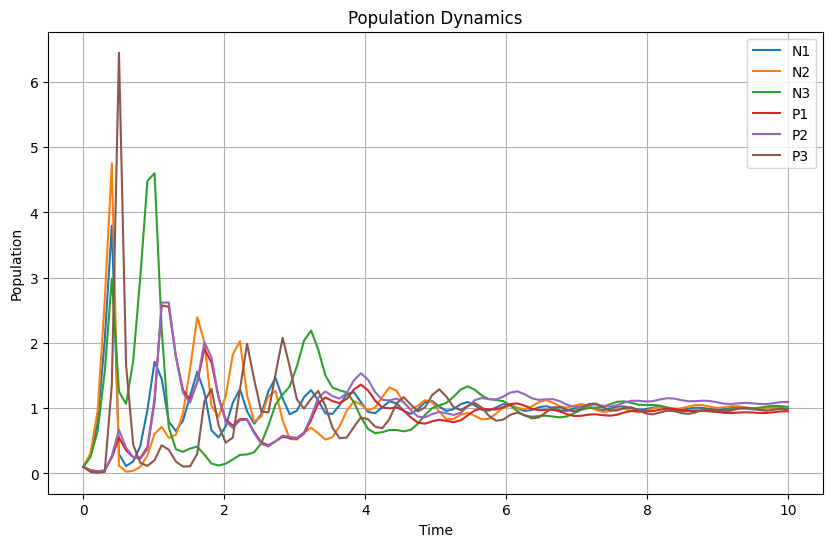

In [7]:
# differential equations
def population_derivatives(t, v):
    N = v[:3]
    P = v[3:]
    dNdt = N * (a - N - np.sum(B * P, axis=1))
    dPdt = P * (np.sum(C * N, axis=1) - d)
    return np.concatenate((dNdt, dPdt))

# initial conditions
v0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Set the time span
t_span = (0, 10)

# Solve dgl
sol = solve_ivp(population_derivatives, t_span, v0, dense_output=True)

# Evaluate
t_eval = np.linspace(t_span[0], t_span[1], 100)

# solution for each population
N1 = sol.sol(t_eval)[0]
N2 = sol.sol(t_eval)[1]
N3 = sol.sol(t_eval)[2]
P1 = sol.sol(t_eval)[3]
P2 = sol.sol(t_eval)[4]
P3 = sol.sol(t_eval)[5]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_eval, N1, label='N1')
plt.plot(t_eval, N2, label='N2')
plt.plot(t_eval, N3, label='N3')
plt.plot(t_eval, P1, label='P1')
plt.plot(t_eval, P2, label='P2')
plt.plot(t_eval, P3, label='P3')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics')
plt.legend()
plt.grid(True)
plt.show()


The prey populations plummit, reaching nearly zero while predator populations spike initially. The lack of prey lead to decline of the predator population, enabeling the prey to recover. This process repeates itself with declining magnitude, as the populations oscillate and eventually reach an equilibrium.